# EDA BegInvFINAL12312016

## 1- Entendimiento Básico del CSV

In [3]:
# Importamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargamos el dataset csv
df = pd.read_csv(r"C:\Users\USUARIO\Downloads\archive\BegInvFINAL12312016.csv")

In [5]:
# Mostramos las primeras filas del dataset
df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [6]:
# Mostramos las últimas filas del dataset
df.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [8]:
# Vemos la dimensión del dataset
df.shape

(206529, 9)

In [9]:
# Vemos tipo de dato y objetos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [10]:
# Vemos las estadísticas descriptivas de las columnas numéricas
# 1. Seleccionar las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# 2. Aplicar describe() al nuevo DataFrame (solo con números)
estadisticas_numericas = df_numerico.describe()

print(estadisticas_numericas)

               Store          Brand         onHand          Price
count  206529.000000  206529.000000  206529.000000  206529.000000
mean       42.122457   13761.482320      20.429455      22.253910
std        23.191393   13059.429355      31.467342      70.178964
min         1.000000      58.000000       0.000000       0.000000
25%        22.000000    3746.000000       7.000000       9.990000
50%        42.000000    8010.000000      12.000000      14.990000
75%        64.000000   22143.000000      21.000000      21.990000
max        79.000000   90090.000000    1251.000000   13999.900000


### Valores únicos

In [14]:
# Conteo de valores únicos por columna
conteo_unicos = df.nunique()

# Para ver los resultados en un formato fácil de leer:
print("--- Conteo de Valores Únicos por Columna ---")
print(conteo_unicos)

--- Conteo de Valores Únicos por Columna ---
InventoryId    206529
Store              79
City               67
Brand            8094
Description      7291
Size               41
onHand            474
Price             329
startDate           1
dtype: int64


In [15]:
# Contar el número total de filas
total_filas = len(df)

# Calcular el porcentaje de valores únicos
porcentaje_unicos = (conteo_unicos / total_filas) * 100

print("\n--- Porcentaje de Valores Únicos Respecto al Total de Filas ---")
print(porcentaje_unicos)


--- Porcentaje de Valores Únicos Respecto al Total de Filas ---
InventoryId    100.000000
Store            0.038251
City             0.032441
Brand            3.919062
Description      3.530255
Size             0.019852
onHand           0.229508
Price            0.159300
startDate        0.000484
dtype: float64


## 2 - Análisis de Calidad de Datos

### Valores Faltantes (NaNs)

In [16]:
# 1. Contar los valores nulos por columna:
conteo_nulos = df.isnull().sum()

# 2. Calcular el total de filas:
total_filas = len(df)

# 3. Calcular el porcentaje y redondear:
porcentaje_nulos = (conteo_nulos / total_filas) * 100

# 4. Mostrar el resultado (opcionalmente filtrando las columnas con NaNs > 0):
print("--- Porcentaje de Valores Faltantes (NaNs) por Columna ---")
print(porcentaje_nulos.sort_values(ascending=False))

--- Porcentaje de Valores Faltantes (NaNs) por Columna ---
InventoryId    0.0
Store          0.0
City           0.0
Brand          0.0
Description    0.0
Size           0.0
onHand         0.0
Price          0.0
startDate      0.0
dtype: float64


El dataset está libre de nulos

### Detección de Valores Atípicos (Outliers)

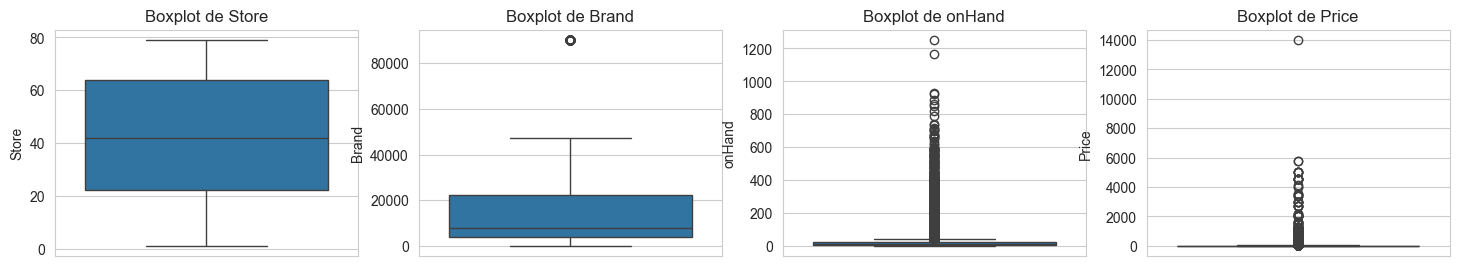

In [17]:
# Boxplots para detectar outliers en columnas numéricas
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))
num_cols = df.select_dtypes(include=['number']).columns
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

📦 Boxplot de Store (Tienda)
Distribución: La variable Store parece estar relativamente bien distribuida.

La mediana (línea en el centro de la caja) se encuentra cerca de 40.

La mayoría de los datos (el 50% central, representado por la caja) se encuentra entre aproximadamente 20 y 65.

Valores Atípicos (Outliers): No se observan outliers. Los bigotes (las líneas que se extienden de la caja) cubren todo el rango de datos, desde 0 hasta 80, indicando que todos los valores están dentro del rango intercuartílico extendido.

🏷️ Boxplot de Brand (Marca)
Distribución: La variable Brand presenta una distribución altamente sesgada o concentrada.

La caja es muy pequeña y está ubicada en la parte baja, indicando que el 50% central de los datos se concentra en valores bajos (aproximadamente entre 5,000 y 20,000).

La mediana es muy baja, quizás alrededor de 10,000.

Valores Atípicos (Outliers): Se observa un claro outlier. El círculo en la parte superior indica un valor extremo de Brand cercano a 80,000. Este valor es significativamente más alto que el resto de los datos y deberá ser revisado durante la fase ETL.

📦 Boxplot de onHand (Inventario)
Distribución: La variable onHand muestra una distribución extremadamente concentrada en valores bajos.

La caja está prácticamente en la base (cercana a 0), lo que significa que la gran mayoría de los ítems tienen un inventario muy bajo.

Valores Atípicos (Outliers): Se observa una gran cantidad de outliers, representados por numerosos círculos que se extienden hasta cerca de 1200. Esto sugiere que, aunque la mayoría de los ítems tienen poco stock, hay unos pocos ítems con niveles de inventario excepcionalmente altos, lo que es común en datos de inventario.

💰 Boxplot de Price (Precio)
Distribución: La variable Price también está extremadamente concentrada en la parte inferior, similar a onHand.

La caja está muy cerca de 0, lo que indica que la mayoría de los precios son muy bajos.

Valores Atípicos (Outliers): Hay una gran cantidad de outliers, extendiéndose hasta un valor máximo de aproximadamente 14,000. Esto indica que existen productos con precios mucho más altos que la media del catálogo, lo cual es un hallazgo importante para el análisis.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12612\1888125727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Store', data=df_top_5, order=top_5_stores, palette='viridis')


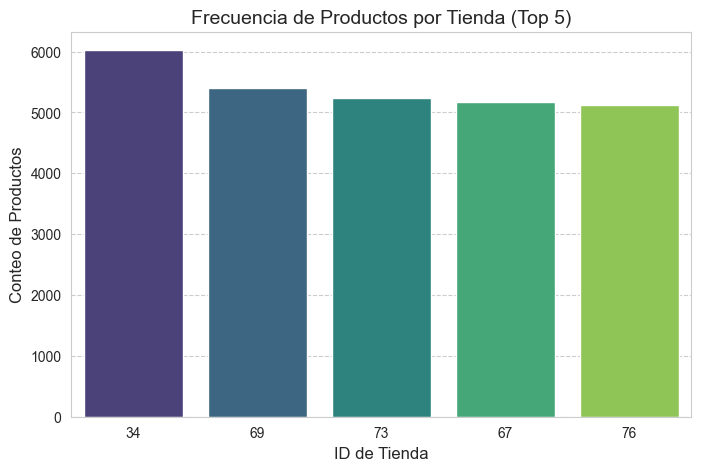

In [20]:
## 1. Calcular el Top 5 de Tiendas

# Contar la frecuencia de aparición de cada ID de tienda y tomar el Top 5
top_5_stores = df['Store'].value_counts().nlargest(5).index

# Filtrar el DataFrame original para incluir solo los datos de esas 5 tiendas
df_top_5 = df[df['Store'].isin(top_5_stores)]

## 2. Graficar la Frecuencia del Top 5 (Gráfico de Barras)
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Store', data=df_top_5, order=top_5_stores, palette='viridis')
plt.title('Frecuencia de Productos por Tienda (Top 5)', fontsize=14)
plt.xlabel('ID de Tienda', fontsize=12)
plt.ylabel('Conteo de Productos', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

<Figure size 1200x600 with 0 Axes>

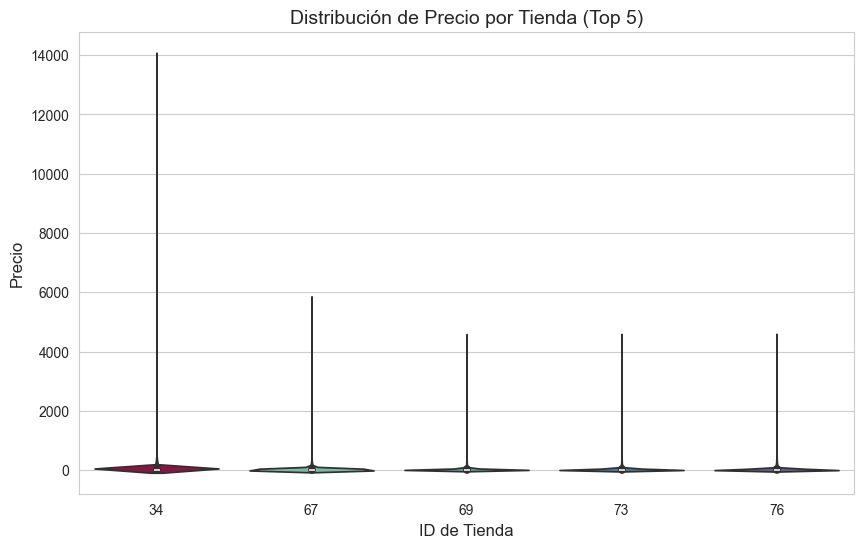

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
## 2. Graficar el Violin Plot del Precio por cada una de esas 5 Tiendas
plt.figure(figsize=(10, 6))
sns.violinplot(x='Store', y='Price', data=df_top_5, palette='Spectral', 
               hue='Store', legend=False)

plt.title('Distribución de Precio por Tienda (Top 5)', fontsize=14)
plt.xlabel('ID de Tienda', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()
